<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [2]:
# Read CSV
wine_csv = 'data/winequality_merged.csv'
wine = pd.read_csv(wine_csv)

# Print Head
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


#### 1.2 Explore Data (Exploratory Data Analysis)

In [3]:
# ANSWER
# Look at column info
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


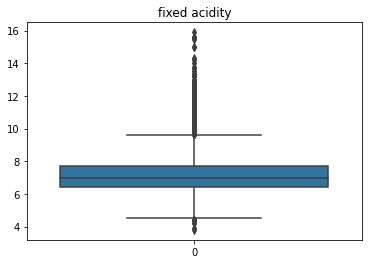

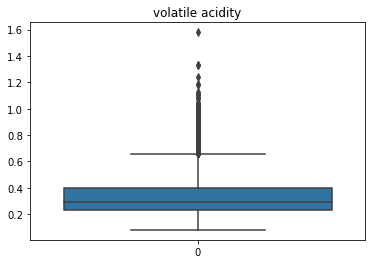

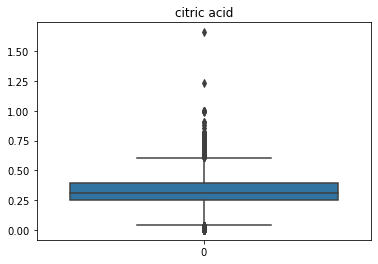

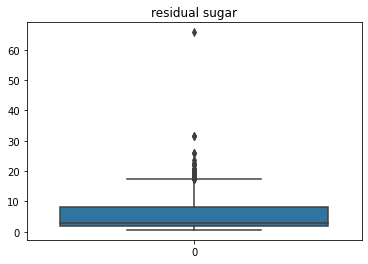

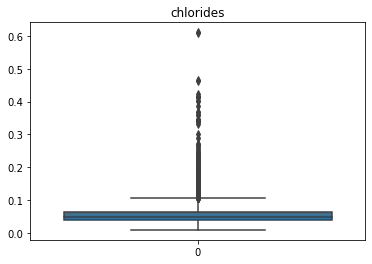

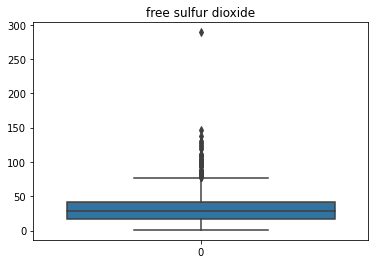

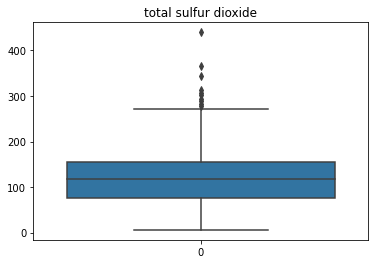

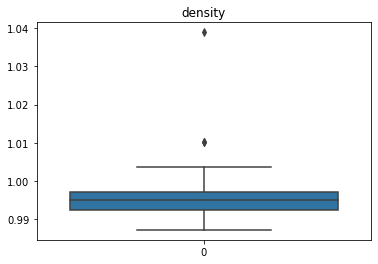

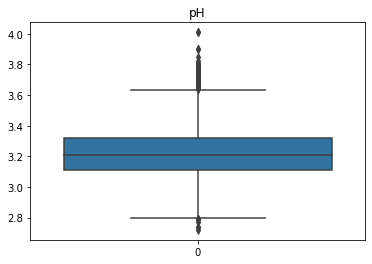

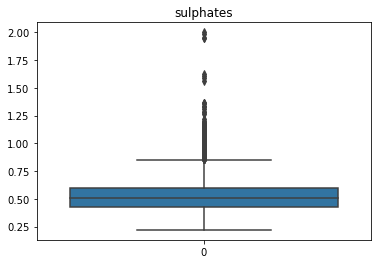

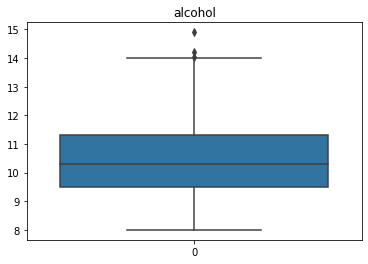

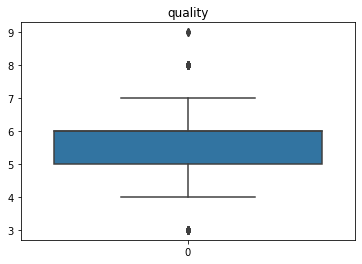

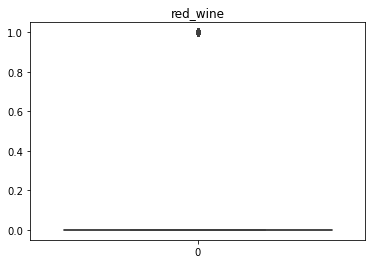

In [4]:
# All numerical data, no null values
# Check outliers
for x in (wine.select_dtypes(include=['int64', 'float64']).columns):
    sns.boxplot(data=wine[x])
    plt.title(x)
    plt.show()

In [5]:
# remove outliers for non-binary data
# Create function to remove unwanted row data - change to null values

def outlier_to_nan(df,column):
    # Assign upper and lower limits
    upper_limit = df[column].mean () + 3 *df[column].std ()
    lower_limit = df[column].mean () - 3 *df[column].std ()
    df.loc[((df[column] > upper_limit) |
    (df[column] < lower_limit)), column] = np.nan
    return df

# Apply function to all columns except: red_wine (binary) and quality (human assigned score)
wine_clean = wine.copy()
for x in list(wine_clean.drop(['quality', 'red_wine'], axis=1).columns):
    wine_clean = outlier_to_nan(wine_clean,x)

# Drop all NaN rows. pH column selection is arbitrary
wine_clean.dropna(inplace=True)

# Verify
wine_clean

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [6]:
# Drop binary/categorical data, useless for our purpose
wine_clean.drop('red_wine', inplace=True, axis=1)

<AxesSubplot:>

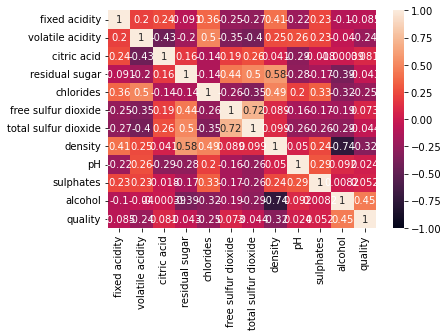

In [7]:
# Create correlation matrix with heatmap
sns.heatmap(wine_clean.corr(), annot=True, vmax=1, vmin=-1)

Most significant correlations are: 
<br>
- Free sulfur dioxide/total sulfur dioxide (0.72) <br>
- Alcohol/density (-0.74) <br>
- residual sugar/density (0.58) <br>
- fixed acidity/density (0.41) <br>
- chlorides/volatile acidity (0.5)


### 2. Set Target Variable

Create a target variable for wine quality.

In [8]:
# Target Variable
# Target variable will be the quality of wine
y = wine_clean[['quality']]

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [9]:
# ANSWER
# Features chosen as follows: 
# alcohol - highest correlation
# EXCLUDED: density - second-highest correlation, but very high intercorrelation with alcohol
# chlorides - third highest correlation, some intercorrelation 
# volatile acidity - fourth-highest correlation, low intercorrelation
X_unscaled = wine_clean[['alcohol', 'chlorides', 'volatile acidity']]

# Normalise the data
# Import scaler
from sklearn.preprocessing import MinMaxScaler
# Call and fit scaler
scaler = MinMaxScaler()
scaler.fit(X_unscaled)
X = pd.DataFrame(scaler.transform(X_unscaled))

### 4. Using Linear Regression Create a Model and Test Score

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
# Create a model for Linear Regression
lr = LinearRegression()
# Fit the model with the Training data
lr.fit(X_train, y_train)
# Calculate the score (R^2 for Regression) for Training Data
print(lr.score(X_train, y_train))
# Calculate the score (R^2 for Regression) for Testing Data
print(lr.score(X_test, y_test))

0.24722347806039424
0.27554440737657493


### BONUS: Cross validation

In [13]:
# Cross validation 
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error

In [14]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train, X_test = X.iloc[train,:], X.iloc[test,:]
    y_train, y_test = y.iloc[train,:], y.iloc[test,:]
    # Fit model with training set
    lr.fit(X_train, y_train)
    # Make predictions with training and test set
    y_train_predict = lr.predict(X_train)
    y_test_predict = lr.predict(X_test)
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr.score(X_train, y_train))
    train_rmse.append(mean_squared_error(y_train, y_train_predict, squared=False))
    test_scores.append(lr.score(X_test, y_test))
    test_rmse.append(mean_squared_error(y_test, y_test_predict, squared=False))


In [15]:
# Create a metrics_df dataframe to display r2 and rmse scores
dict={'train_scores': train_scores, 'train_rmse': train_rmse, 'test_scores': test_scores, 'test_rmse': test_rmse}
metrics_df = pd.DataFrame(data=dict)

metrics_df.head()

,train_scores,train_rmse,test_scores,test_rmse
0,0.257955,0.744866,0.231119,0.753895
1,0.250893,0.751402,0.258392,0.727766
2,0.251202,0.742395,0.255727,0.764248
3,0.250263,0.753748,0.260569,0.717842
4,0.254031,0.740430,0.246608,0.771515


In [16]:
# Describe the metrics
metrics_df.describe()

,train_scores,train_rmse,test_scores,test_rmse
count,5.000000,5.000000,5.000000,5.000000
mean,0.252869,0.746568,0.250483,0.747053
std,0.003189,0.005764,0.012060,0.023271
min,0.250263,0.740430,0.231119,0.717842
25%,0.250893,0.742395,0.246608,0.727766
50%,0.251202,0.744866,0.255727,0.753895
75%,0.254031,0.751402,0.258392,0.764248
max,0.257955,0.753748,0.260569,0.771515


The test scores are generally at quite a low accuracy, with a mean R-score of 0.25. The mean square error of the test samples is 0.75, almost identical to the training error.

### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

Average testing data regression score is as above.<br>
Three features have been selected. Improvements to the model may be possible with more features, though it would probably only add marginally to accuracy. Let's test by using all possible features

In [17]:
wine_clean

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [18]:
# Call all variables
y = wine_clean[['quality']]
X_unscaled = wine_clean.copy().drop('quality', axis=1)


# Call and fit scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_unscaled)

# Immediately generate cross_val scores
# Import ridge model
from sklearn.linear_model import Ridge
scores = cross_val_score(lr, X, y, cv=5)
scores_ridge = cross_val_score(Ridge(alpha=70), X, y, cv=5)
print("Mean cross validation score of selected features model:", metrics_df['train_scores'].mean())
print("Mean cross validation score of all features model:", np.mean(scores))
print("Mean cross validation score of all features ridge model:", np.mean(scores_ridge))




Mean cross validation score of selected features model: 0.25286875765742345
Mean cross validation score of all features model: 0.15370557020912606
Mean cross validation score of all features ridge model: 0.22180409945544657


Even a partially optimised ridge regression with all features has poor performance vs the linear regression with selected features.

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



